In [46]:
# For the white wine dataset (notorious, infamous)
# Using CTGAN instead in order to "fill in the gaps"
# another option: Copula Synthesizer 
# but for I will stick to CTGAN

# TomekLinks to clean out the overlapping through the dataset
# Autoencoders instead of TomekLinks, might be viable
# consider using ClusterCentroids for noise/overlap removal
# https://miro.medium.com/v2/resize:fit:700/1*1XlHmnc9hKn1oPz48lrn7Q.png

# Kmeans Clustering => let's try assigning each wine a 
# automated unsupervised AI cluster => use this information
# to determine the difference between qualities 5 and 6
# also experiment on other clustering methods than KMeans
# https://scikit-learn.org/1.5/_images/sphx_glr_plot_cluster_comparison_001.png

<h4>Here is to improve the white wine dataset further for the model to work efficiently</h4>

In [81]:
# import the modules needed
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix
import itertools
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from ctgan import CTGAN
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours
# from adasyn import ADASYN
#from sdv.tabular import CTGAN
#from ctgan import CTGANSynthesizer

# pip install xgboost
from xgboost import XGBClassifier

In [ ]:
# pd.set_option('display.float_format', '{:.1f}'.format)
# I load the dataset for reading on pandas
# and dropped all the duplicates
df = pd.read_csv("white_wine_cleaned.csv")

df = df.drop_duplicates()

In [83]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
6      9.6        6

In [84]:
# Goal here is to achieve optimisation
# So its important lock the random seed
# this is to have same result
# without interference but for reproducibility
# random_seed = 437887
random_seed = 789765555

random.seed(random_seed)
np.random.seed(random_seed)

<h4>Starting with synthesizing with CTGAN</h4>

In [86]:
df.corr()['quality']

fixed acidity          -0.124636
volatile acidity       -0.190678
citric acid             0.007065
residual sugar         -0.117339
chlorides              -0.217739
free sulfur dioxide     0.010507
total sulfur dioxide   -0.183356
density                -0.337805
pH                      0.123829
sulphates               0.053200
alcohol                 0.462869
quality                 1.000000
Name: quality, dtype: float64

In [87]:

# X/y -split
X = df.drop("quality", axis=1)
y = df['quality']

# Store the synthetic and original datasets
authentic_df = df.copy()
# df = synthetic_df

# print("Synthetic data generation complete!")


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# enn = EditedNearestNeighbours(n_neighbors=3)
enn = EditedNearestNeighbours(n_neighbors=3, sampling_strategy=[5, 6])
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)

print(f"Original data shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled data shape: {X_resampled.shape}, {y_resampled.shape}")

Original data shape: (2772, 11), (2772,)
Resampled data shape: (888, 11), (888,)


In [89]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['quality'] = y_resampled

<Axes: >

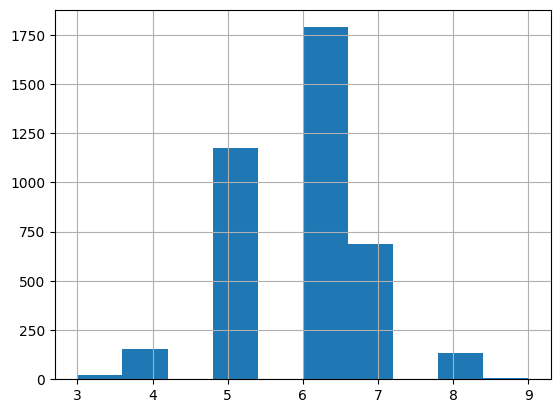

In [90]:
df['quality'].hist()

<Axes: >

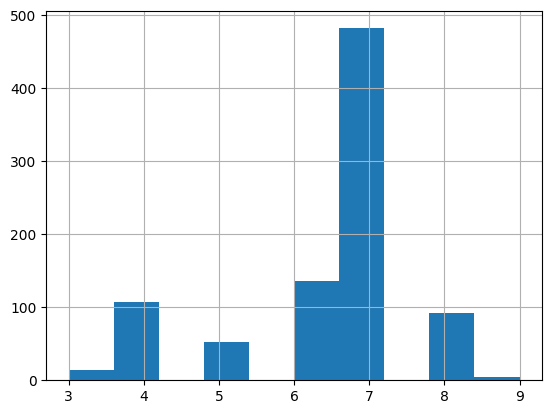

In [91]:
df_resampled['quality'].hist()

In [53]:
authentic_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
6                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
6         9.6        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[3961 rows x 12 columns]

In [54]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          6.579889          0.318738     0.411736       15.104723   0.046754   
1          6.626465          0.239186     0.262970       12.531543   0.028628   
2          7.018437          0.344277     0.237223        2.167054   0.039209   
3          5.351146          0.667082     0.218903       17.691622   0.051640   
4          6.552774          0.243786     0.405335        7.661616   0.023605   
...             ...               ...          ...             ...        ...   
3956       5.786693          0.387788     0.420246        2.215853   0.032764   
3957       7.668086          0.404025     0.469037        4.885127   0.019355   
3958       6.759404          0.502339     0.338149       13.397666   0.048512   
3959       5.696807          0.198151     0.262869       16.660343   0.075490   
3960       7.160335          0.293209     0.393427       14.948023   0.038473   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               61.339087            176.363272  0.992383  3.462494   
1               12.114124            153.744660  0.996868  3.217396   
2                0.031291             96.298116  0.991692  3.369865   
3               58.194547            192.262690  0.998936  3.298918   
4               43.807190            159.318294  0.992782  3.309869   
...                   ...                   ...       ...       ...   
3956            18.737340             90.271923  0.989682  3.169670   
3957            24.540029            126.754020  0.995911  3.203642   
3958            23.254132            188.326685  0.995135  3.072722   
3959            23.231504            132.028348  0.993557  3.153644   
3960            44.624632            196.639470  0.996121  3.183984   

      sulphates    alcohol  quality  
0      0.565908  11.851065        8  
1      0.306682   9.276054        4  
2      0.460135  10.741096        4  
3      0.483117   9.109714        8  
4      0.395846  12.045562        6  
...         ...        ...      ...  
3956   0.512960  11.342613        6  
3957   0.315142  10.275255        3  
3958   0.364270  10.678051        4  
3959   0.577557  12.017240        8  
3960   0.491926   9.364651        8  

[3961 rows x 12 columns]

<b>NB:<b> 
<h4>Before sythentic data, The distribution is highly showed imbalanced. Classes with lower values (like 3 and 9) have very few instances (20 and 5 samples respectively), while class 6 has the most instances with 1,788 samples. I this imbalance could be bias in the model towards predicting the majority class (class 6) and lead to poor generalization for minority classes.
And after the synthetic data, the distribution shows that only the class 7 has increased in sample size, now almost matching the sample size of the majority class 6. However, other minority classes (such as 3 and 9) remain unchanged, which I think suggested a targeted or partial oversampling approach where only certain classes were synthetically generated. This approach can reduce model bias without excessively generating synthetic data, allowing for better representation of class 7 while maintaining the original distribution of the other classes.</h4>

In [92]:
# max threshold for majority classes
threshold = 53

# temporary list to containe sample rows
sampled_data = []

for quality, group in authentic_df.groupby('quality'):
    # if a minority group, just add all the data
    if len(group) <= threshold:
        sampled_data.append(group)
    else:
        sampled_data.append(group.sample(threshold))


# combine all data in the sample list
authentic_sample = pd.concat(sampled_data)

# drop the selected data from the original data
authentic_df = authentic_df.drop(authentic_sample.index)

# reset indexes
authentic_sample = authentic_sample.reset_index(drop=True)
authentic_df = authentic_df.reset_index(drop=True)

df = pd.concat([df, authentic_df])
df = df.reset_index(drop=True)

In [93]:
df.corr()['quality']

fixed acidity          -0.115610
volatile acidity       -0.191419
citric acid             0.004542
residual sugar         -0.125101
chlorides              -0.214631
free sulfur dioxide     0.004486
total sulfur dioxide   -0.187599
density                -0.338291
pH                      0.125491
sulphates               0.057159
alcohol                 0.462948
quality                 1.000000
Name: quality, dtype: float64

In [94]:
tomek = TomekLinks()

# Display new class distribution
print("Class distribution before overlap removal:")
print(df['quality'].value_counts())

# X/y -split
X = df.drop("quality", axis=1)
y = df['quality']

# create new resampled versions of X and y
X, y = tomek.fit_resample(X, y)

# re-create a new DataFrame
df = pd.DataFrame(X, columns=X.columns)
df['quality'] = y

# Display new class distribution
print("Class distribution AFTER overlap removal:")
print(df['quality'].value_counts())

Class distribution before overlap removal:
quality
6    3523
5    2297
7    1325
4     253
8     209
3      20
9       5
Name: count, dtype: int64
Class distribution AFTER overlap removal:
quality
6    3523
5    2296
7    1323
4     251
8     207
3      17
9       5
Name: count, dtype: int64


In [95]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
7617            6.2              0.21         0.29             1.6      0.039   
7618            6.6              0.32         0.36             8.0      0.047   
7619            6.5              0.24         0.19             1.2      0.041   
7620            5.5              0.29         0.30             1.1      0.022   
7621            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
7617                 24.0                  92.0  0.99114  3.27       0.50   
7618                 57.0                 168.0  0.99490  3.15       0.46   
7619                 30.0                 111.0  0.99254  2.99       0.46   
7620                 20.0                 110.0  0.98869  3.34       0.38   
7621                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.6        6  
...       ...      ...  
7617     11.2        6  
7618      9.6        5  
7619      9.4        6  
7620     12.8        7  
7621     11.8        6  

[7622 rows x 12 columns]

In [96]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('quality', axis=1))

# filter only qualities 5 and 6 from the dataset
# BY DEFAULT APPLYING CLUSTERING ONLY TO A SUBSET OF DATA CAN BE RISKY
# ALWAYS DOUBLE-CHECK AND CROSS-VALIDATE
# AND CHECK THAT THE DISTRIBUTION IS HELPFUL AND MAKES SENSE
df_overlap = df[df['quality'].isin([5,6])]

X_overlap_scaled = scaler.transform(df_overlap.drop("quality", axis=1))

# use KMeans to cluster these wines into clusters
# => try to find a separation where the algorithm recognizes the wines
# without knowing the actual quality level
clusterer = KMeans(n_clusters=4, init="k-means++", tol=1e-10)

labels = clusterer.fit_predict(X_overlap_scaled)

df_overlap['cluster'] = labels

# this clustering information is added to the original dataset as a new helper variable

# wines with quality less than 5 use the same cluster as quality 5
# wines with qualite more than 6 use the same cluster as quality 6
    
X_all_scaled = scaler.transform(df.drop("quality", axis=1))
# add the cluster information back to the DataFrame
#df['cluster'] = df.apply(map_cluster_value, axis=1)
labels = clusterer.predict(X_all_scaled) 
df['cluster'] = labels

X_authentic_scaled = scaler.transform(authentic_sample.drop("quality", axis=1))
labels = clusterer.predict(X_authentic_scaled)
authentic_sample['cluster'] = labels

In [97]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  cluster  
0      8.8        6        2  
1      9.5        6        0  
2     10.1        6        1  
3      9.9        6        3  
4      9.6        6        3

In [98]:
cluster_counts = df.groupby(['quality', 'cluster']).size().unstack(fill_value=0)
print(cluster_counts)

cluster     0    1    2    3
quality                     
3           2    5    6    4
4          62   83   30   76
5         357  510  650  779
6        1174  903  636  810
7         816  311   93  103
8         129   54    8   16
9           4    1    0    0


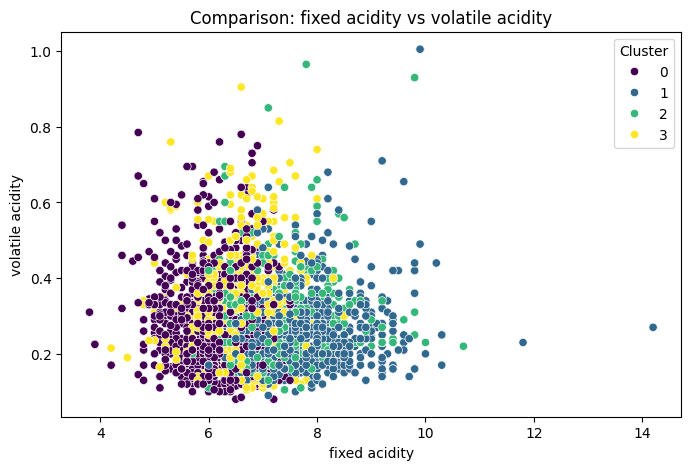

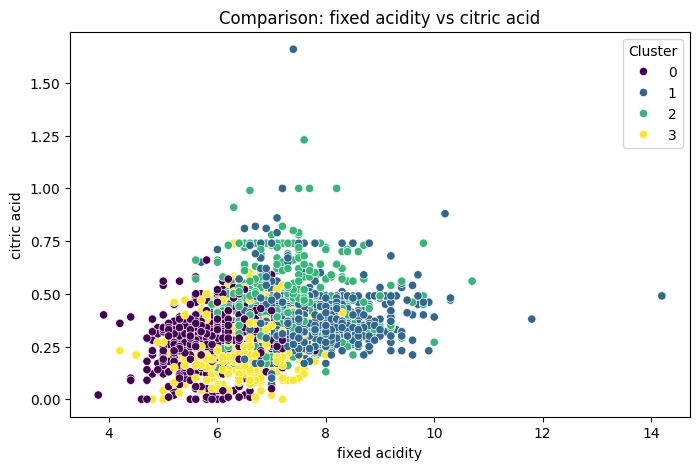

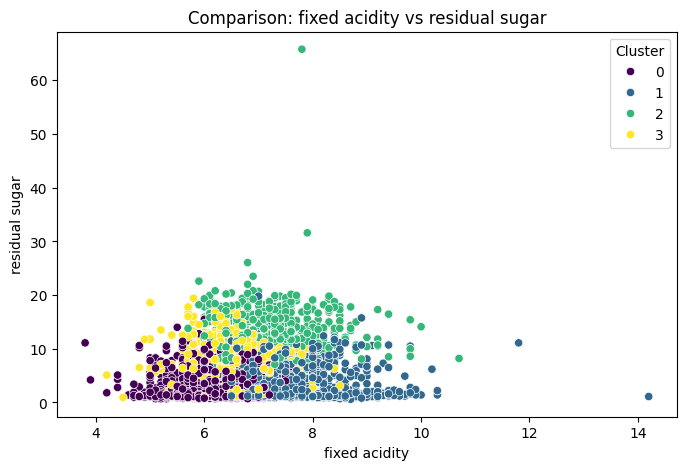

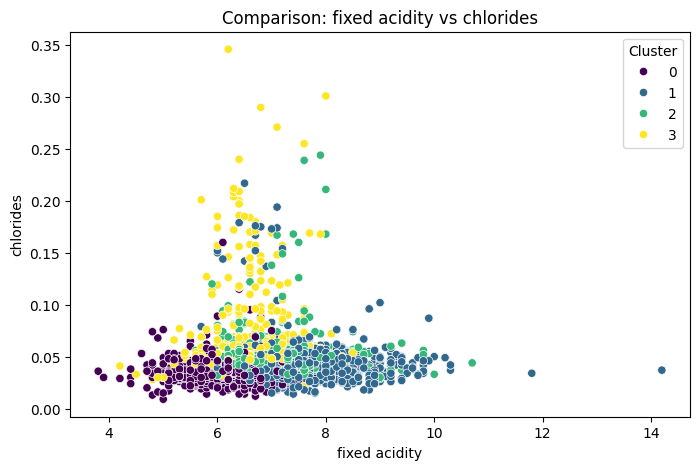

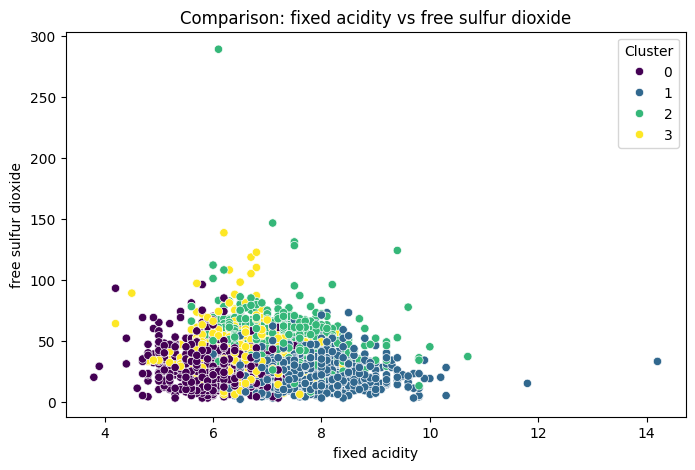

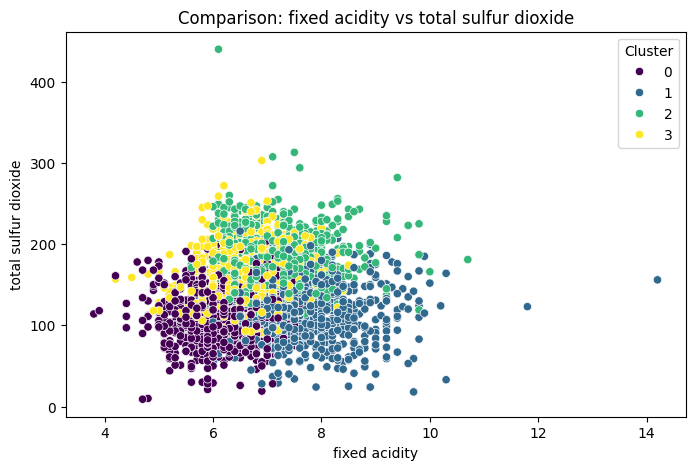

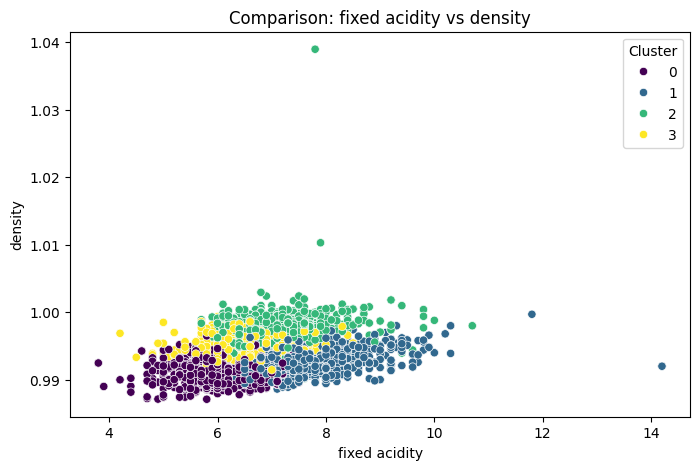

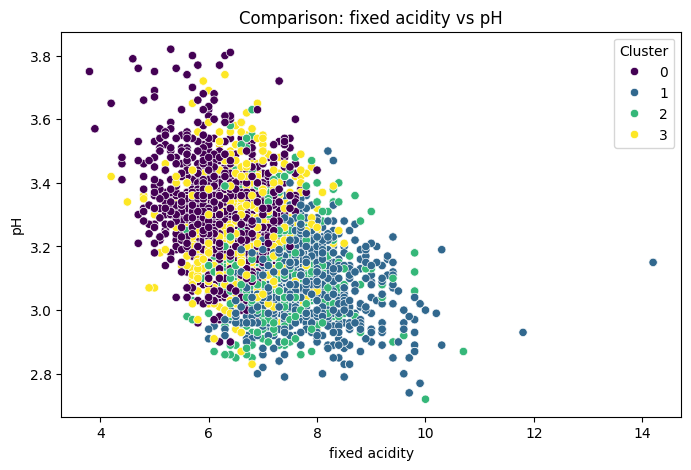

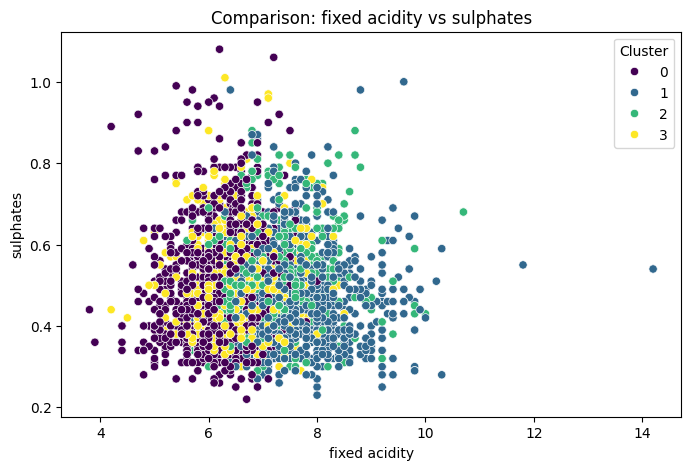

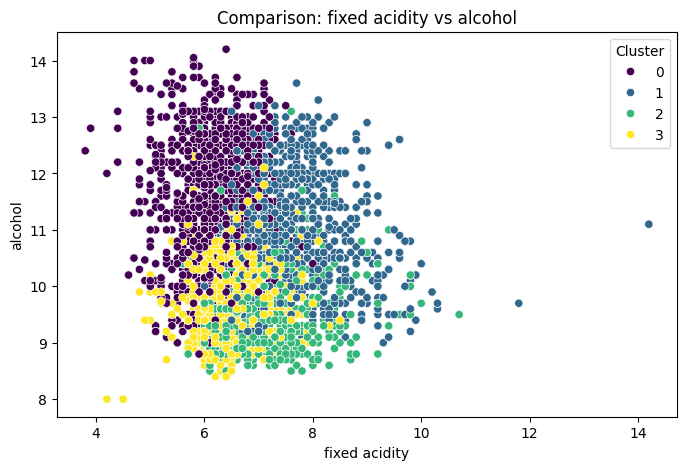

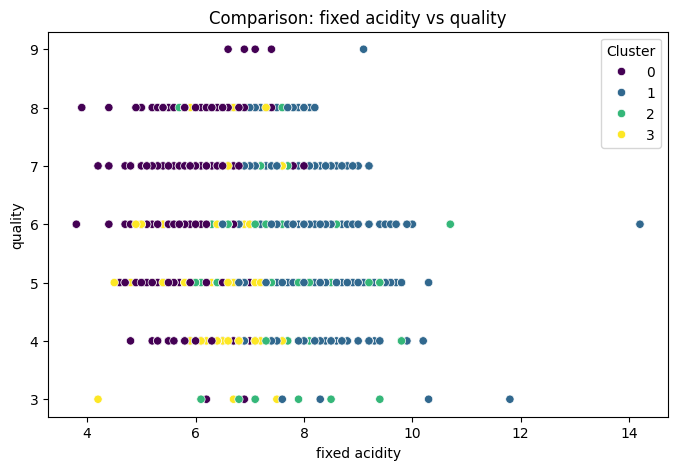

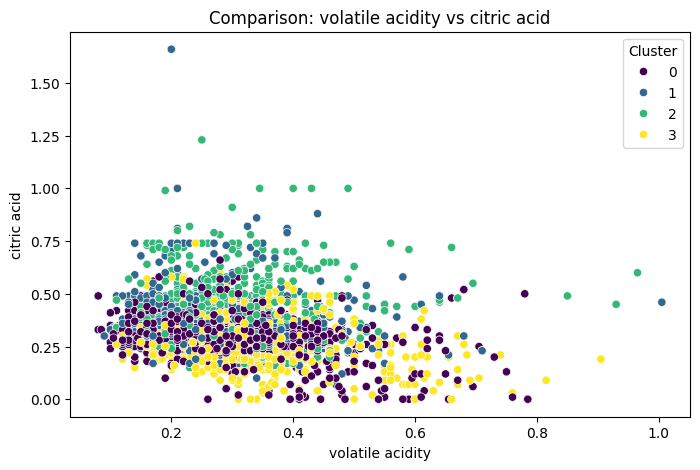

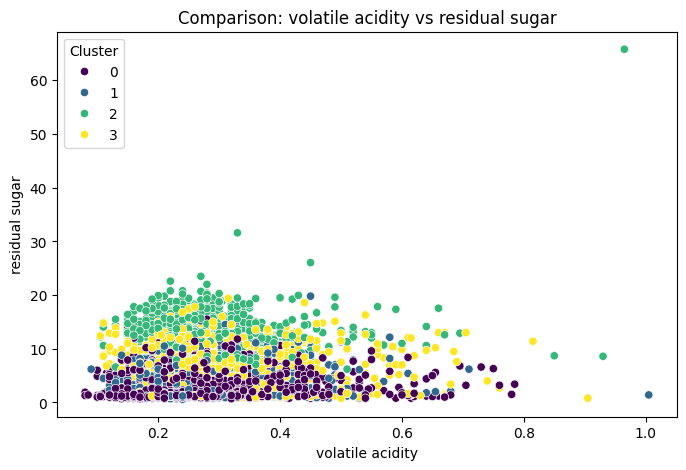

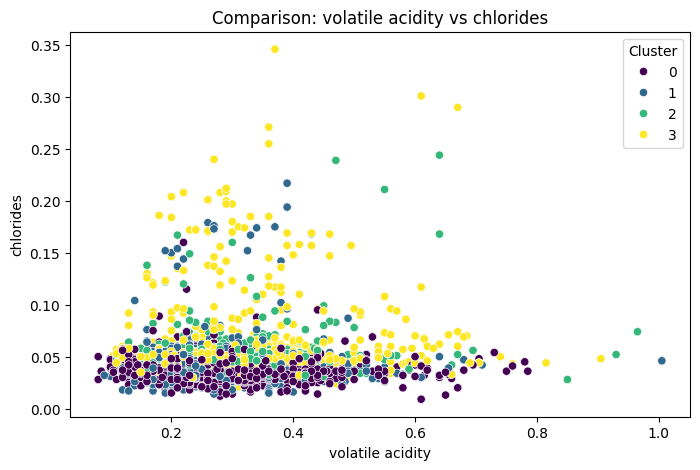

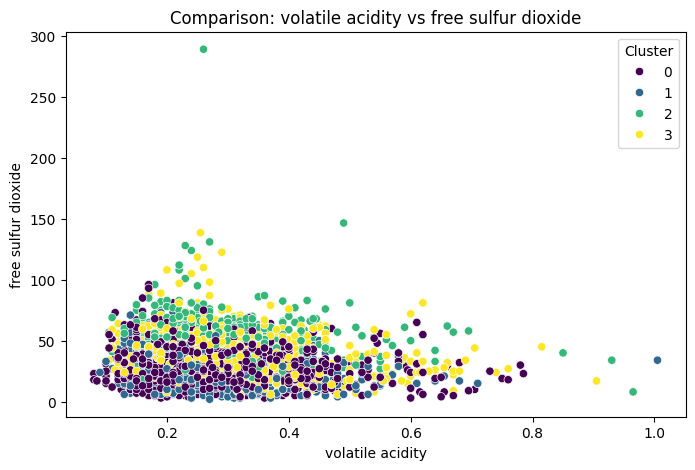

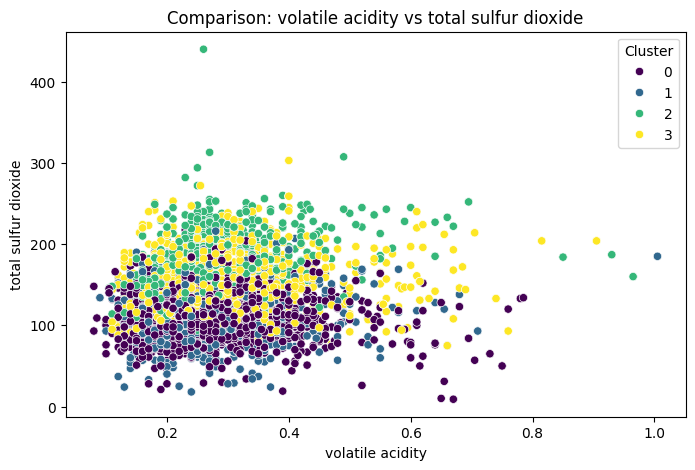

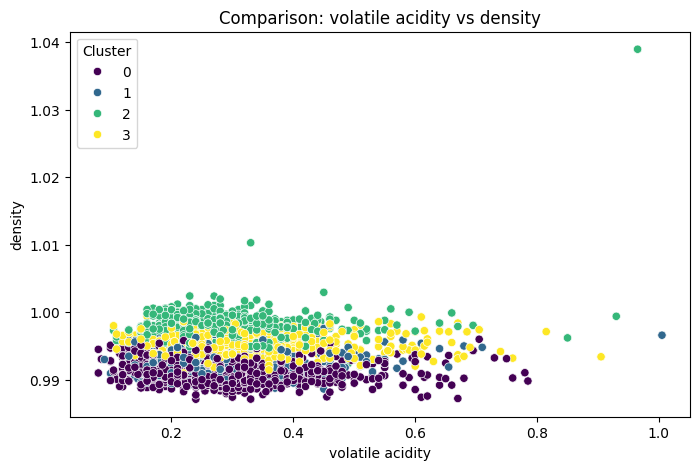

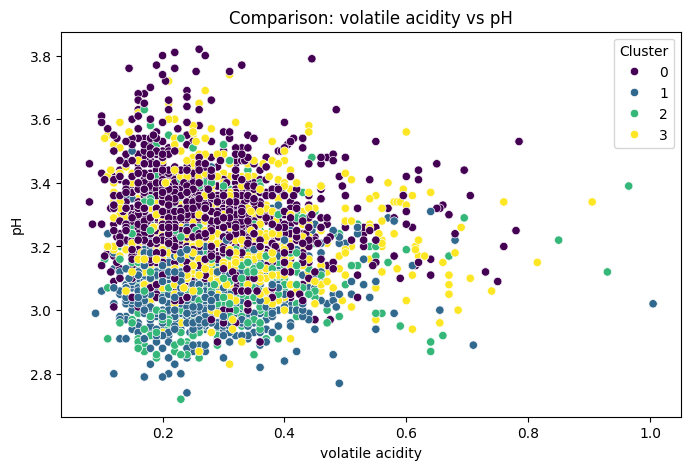

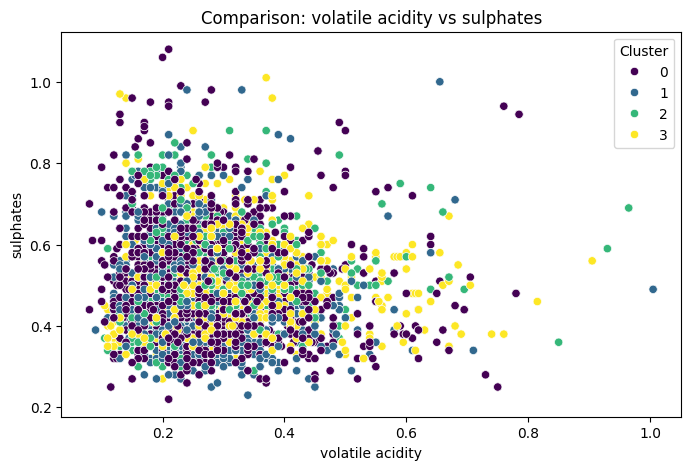

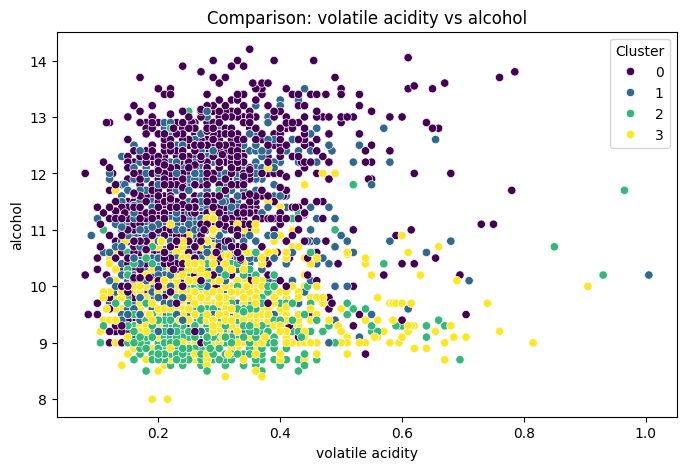

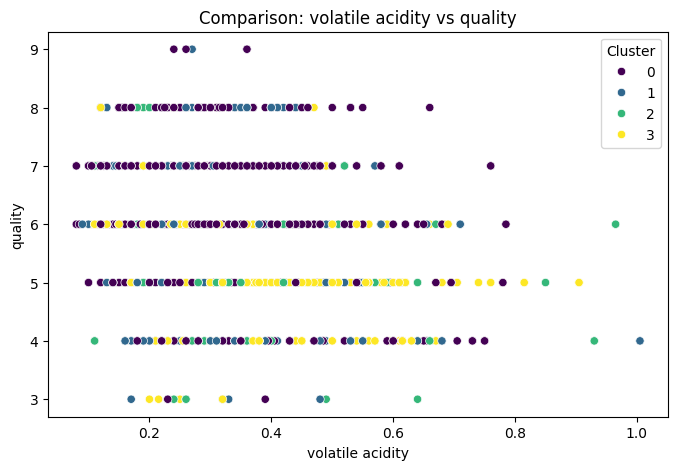

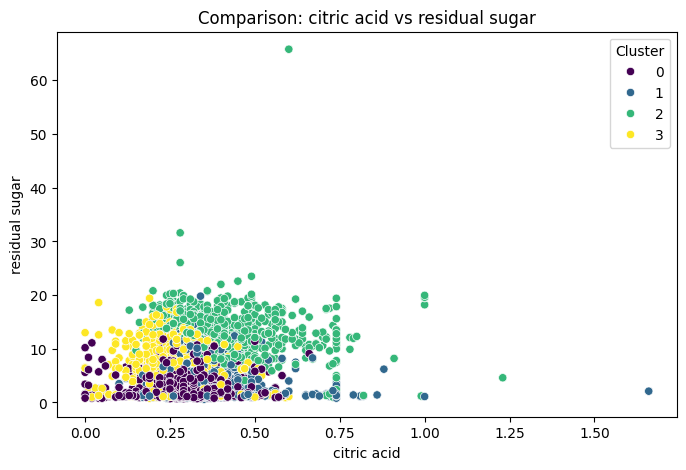

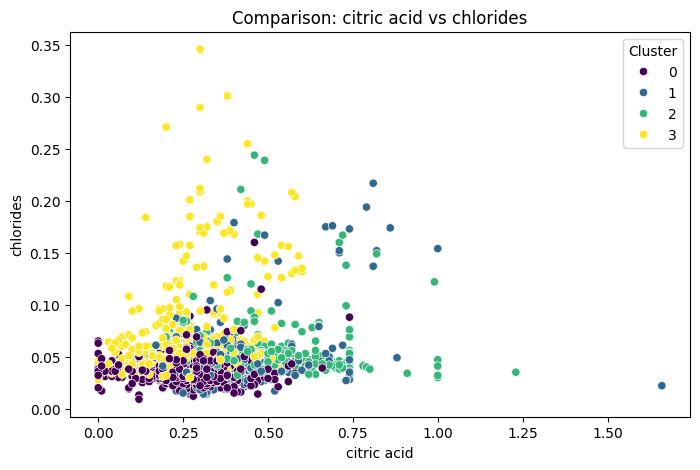

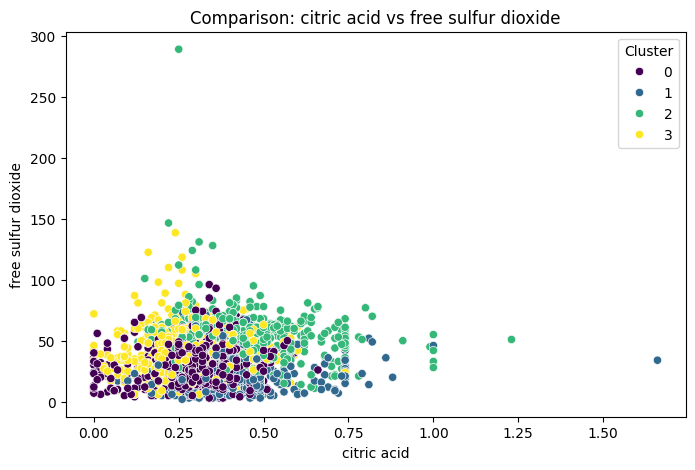

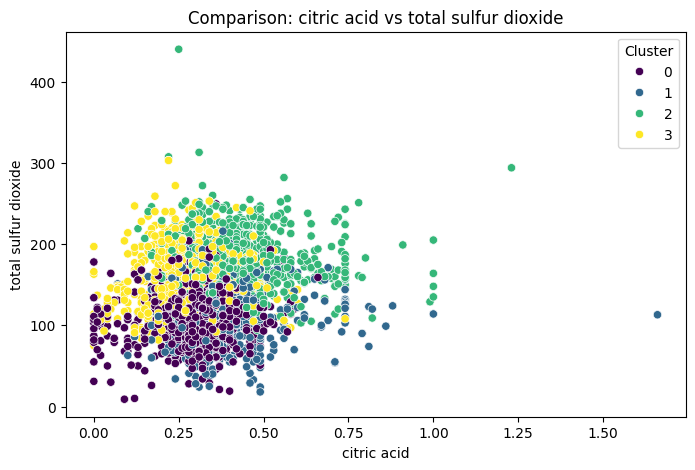

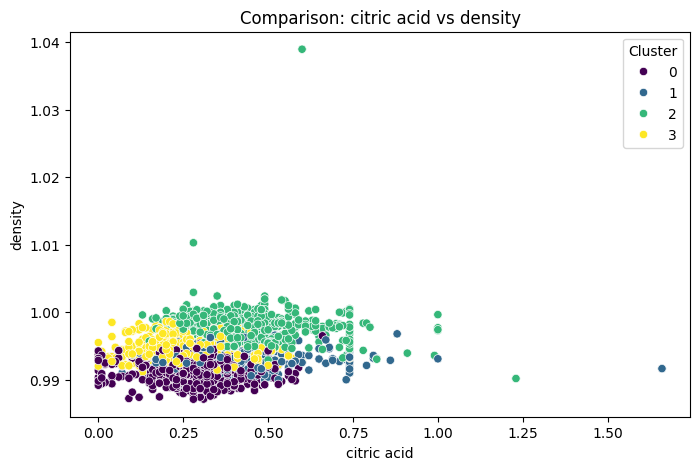

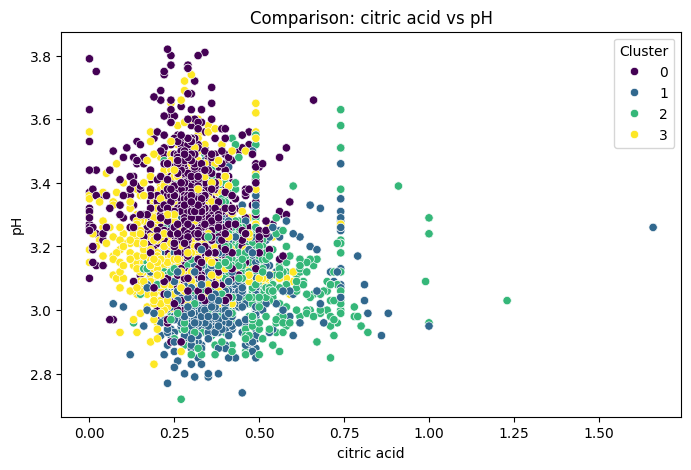

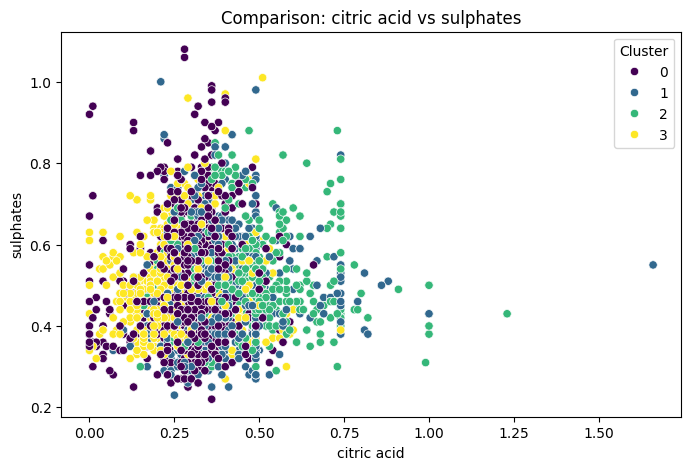

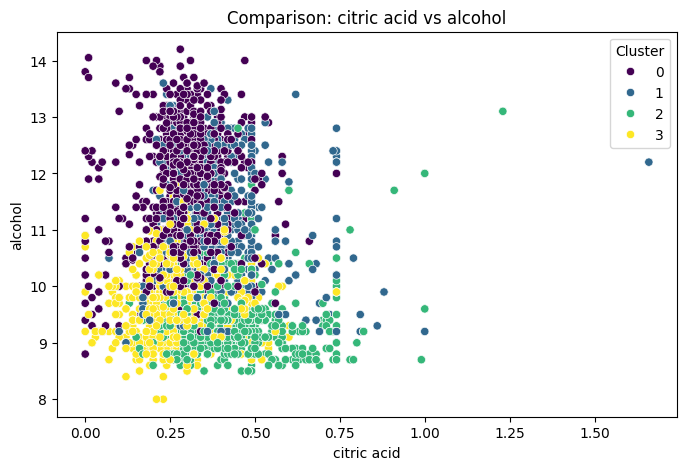

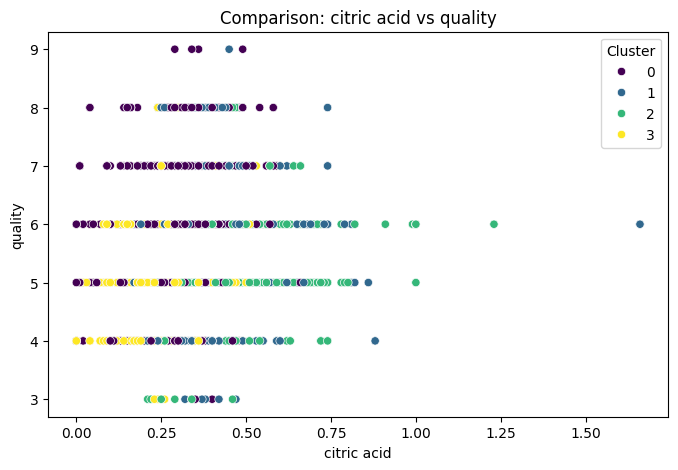

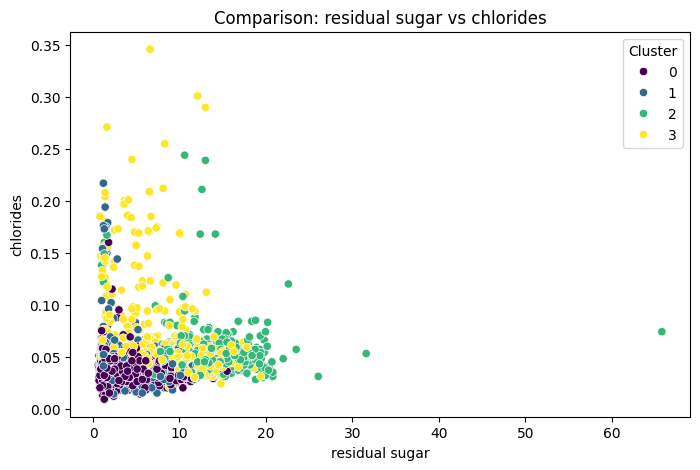

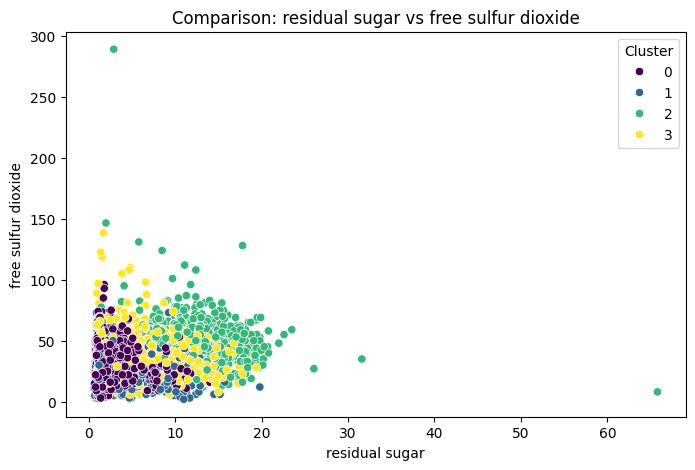

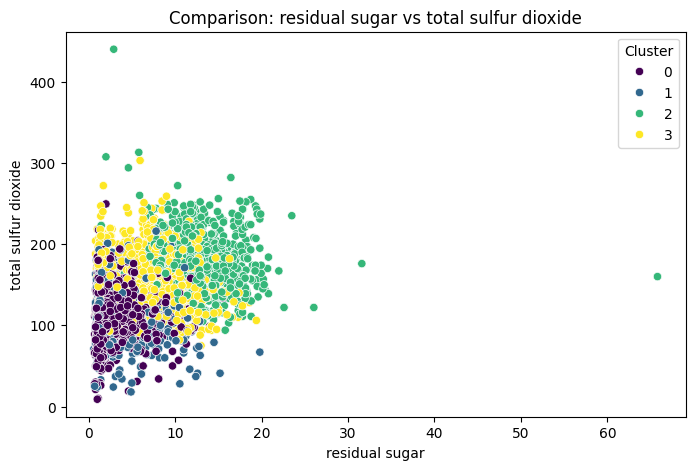

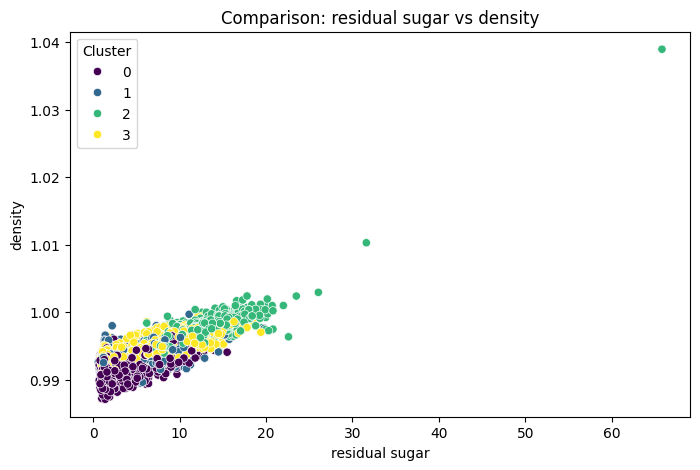

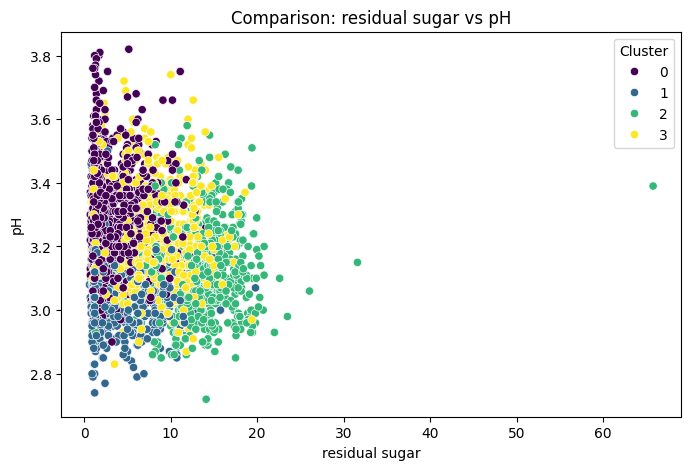

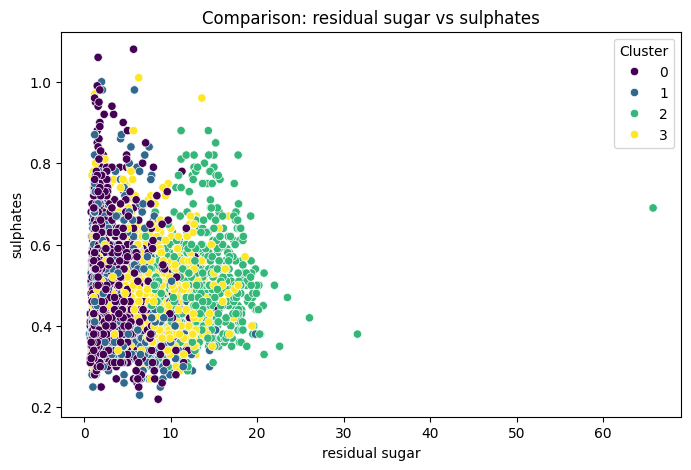

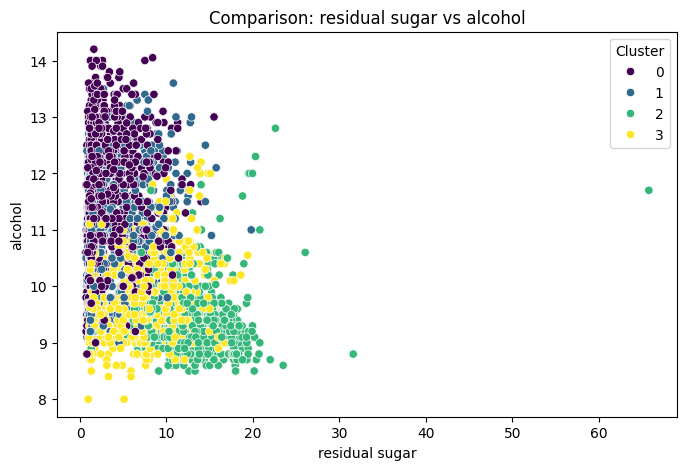

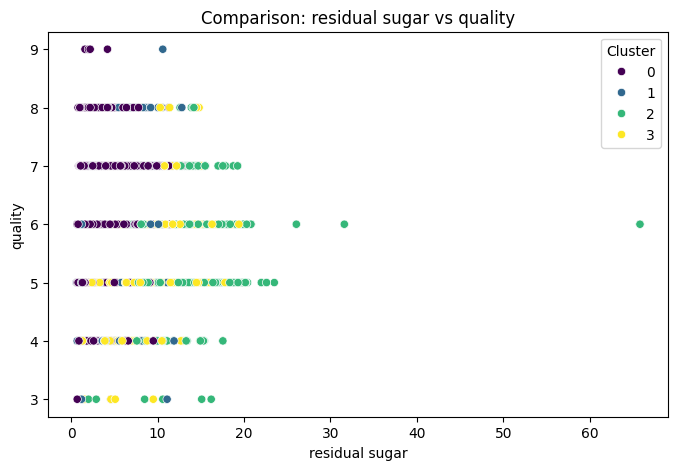

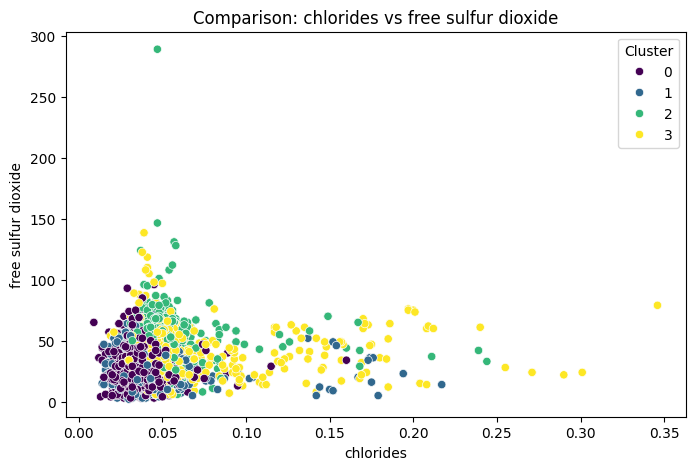

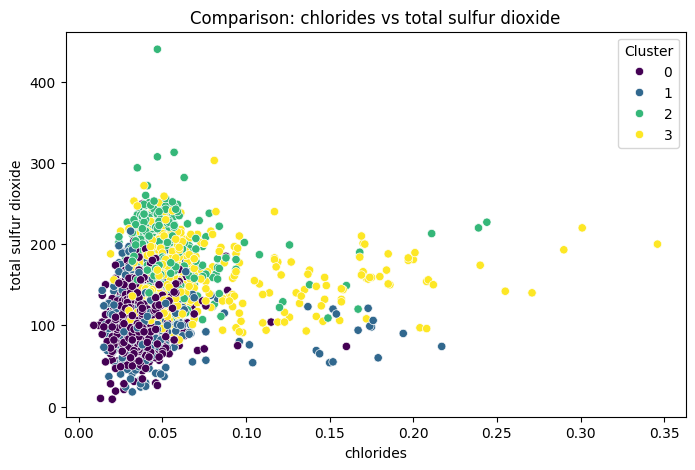

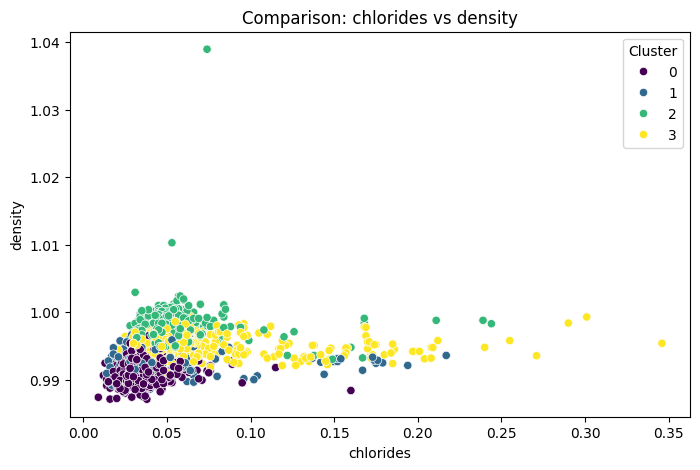

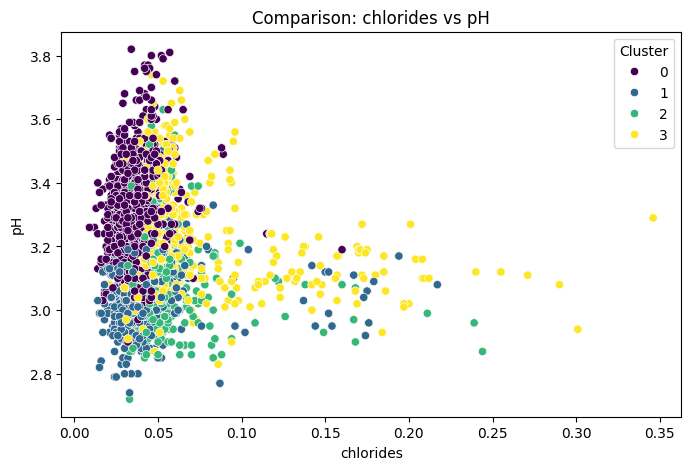

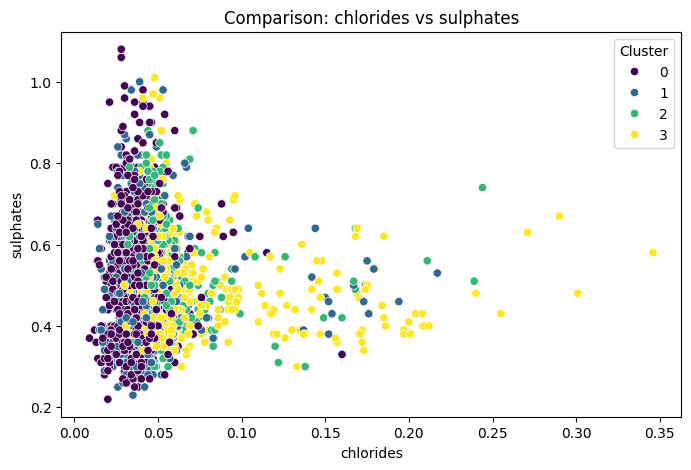

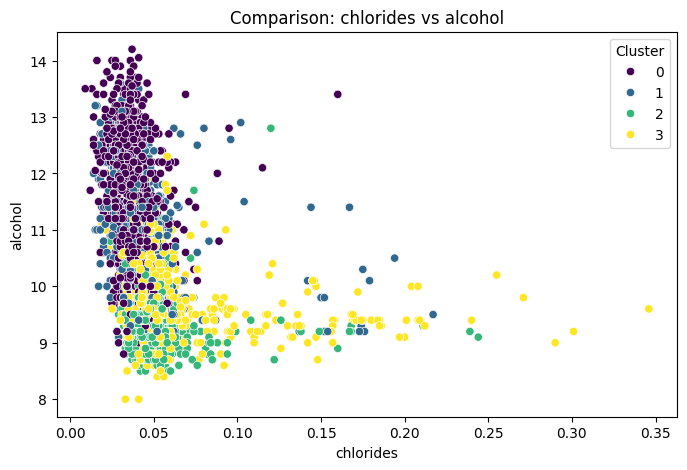

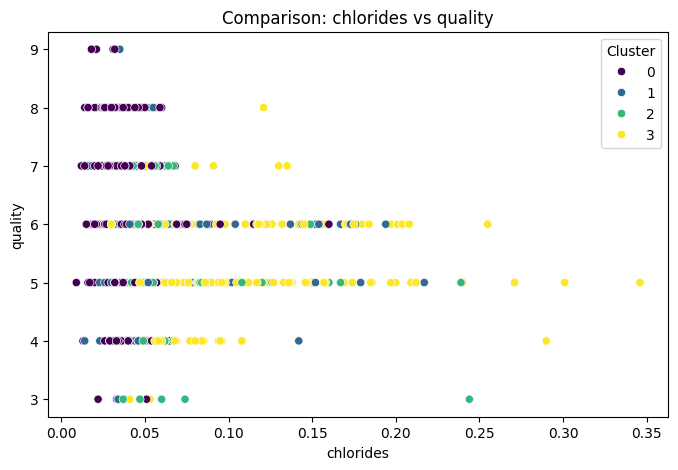

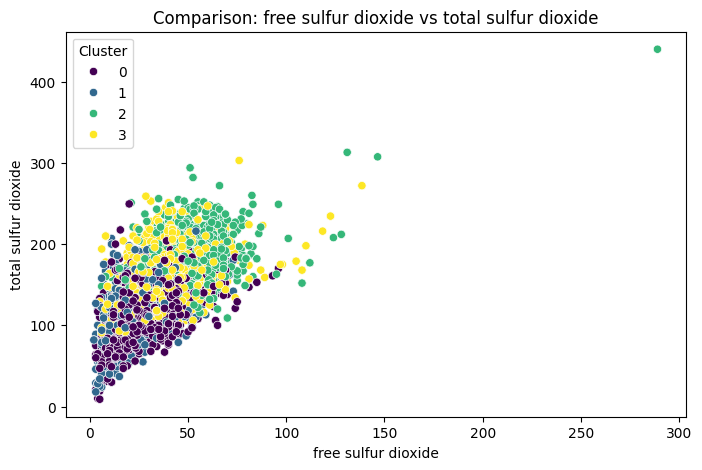

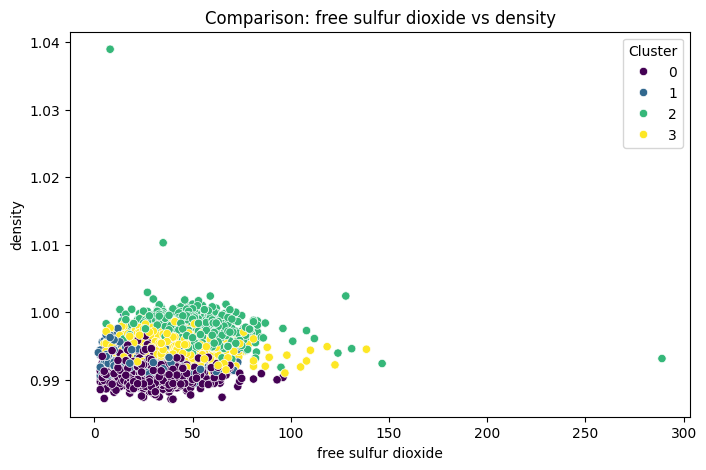

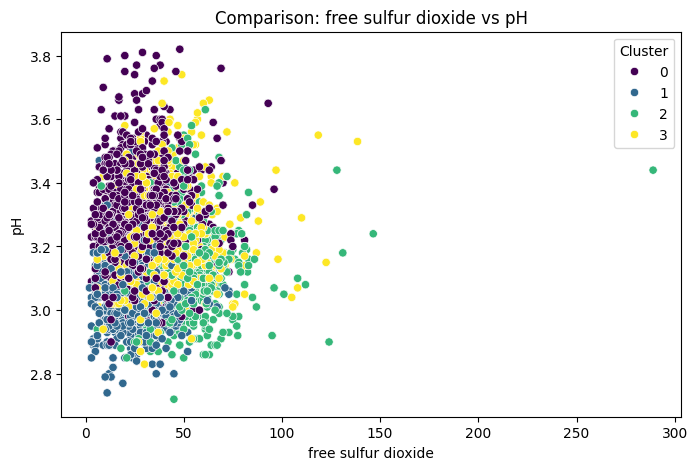

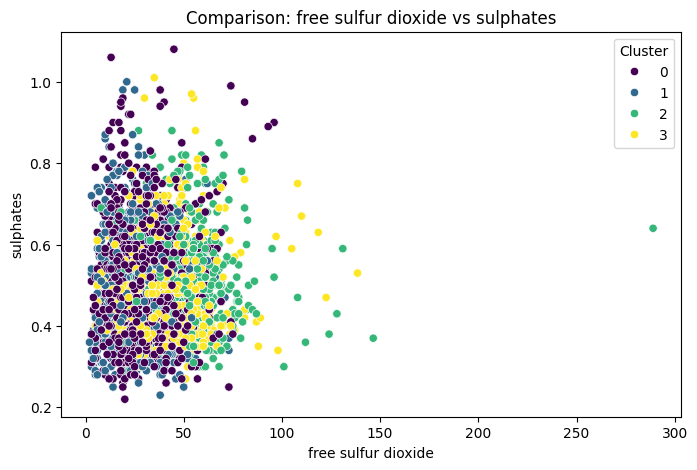

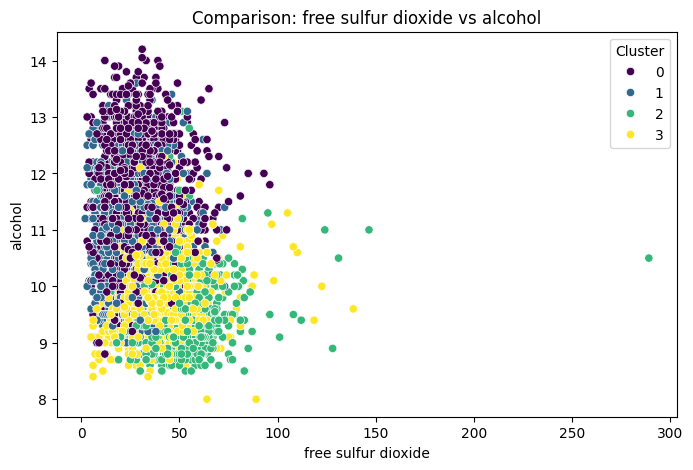

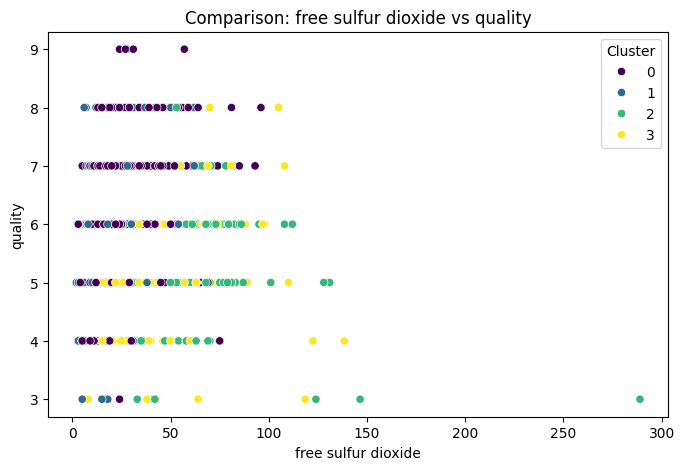

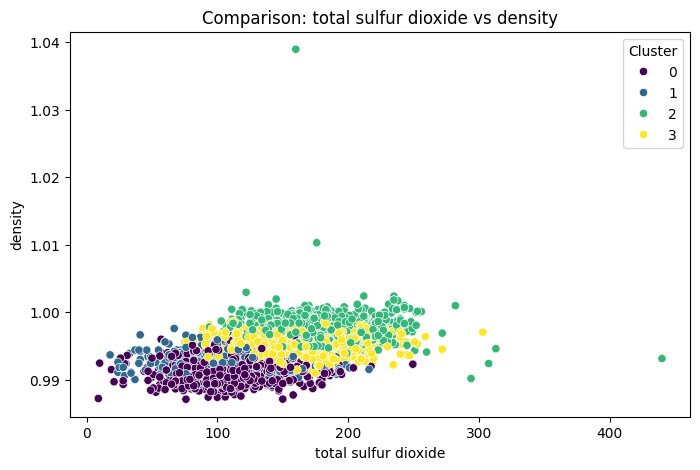

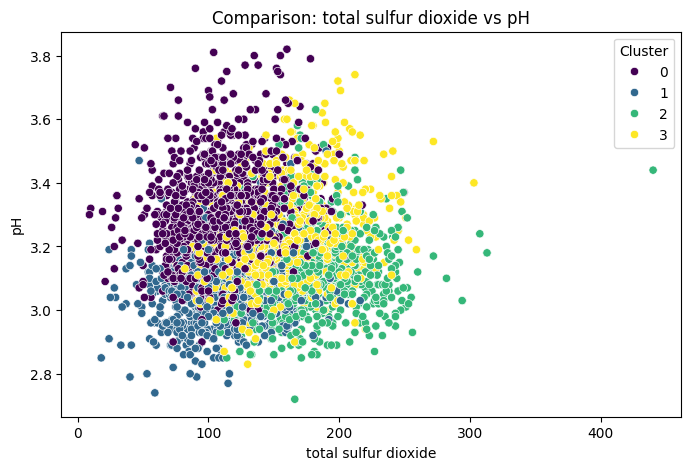

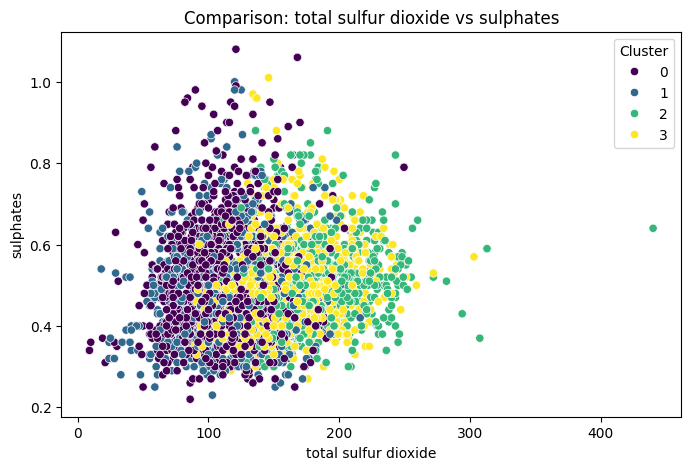

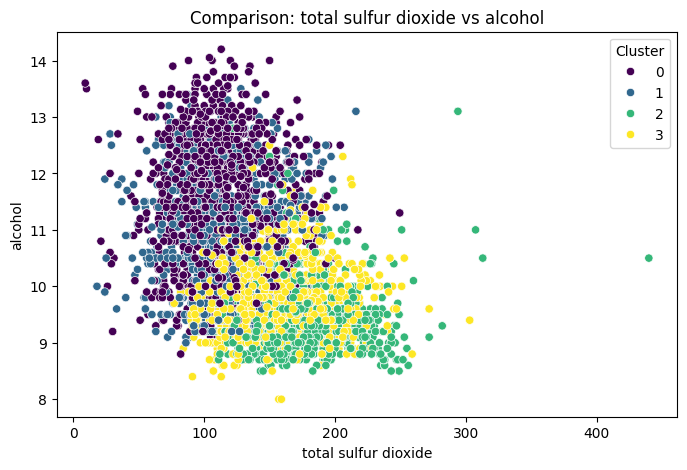

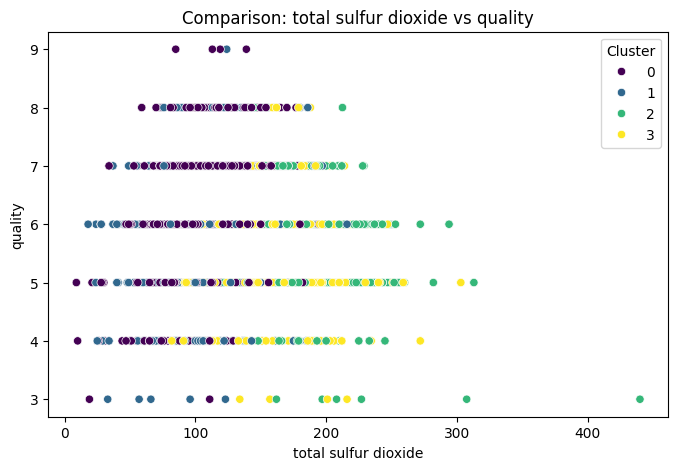

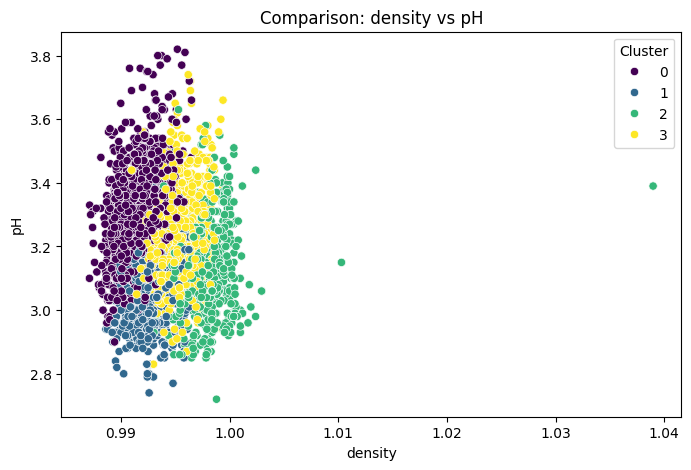

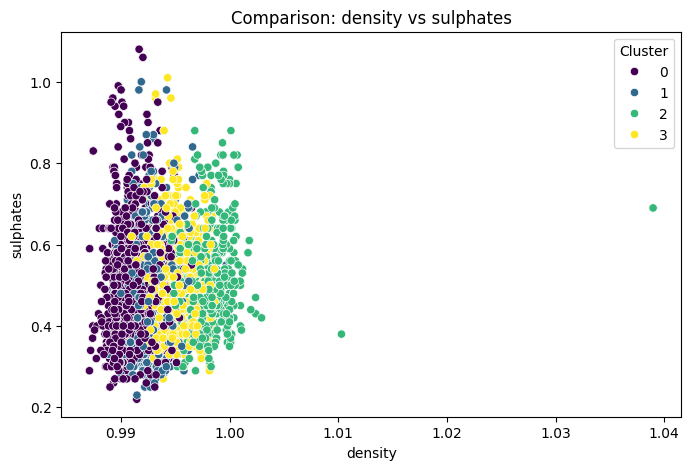

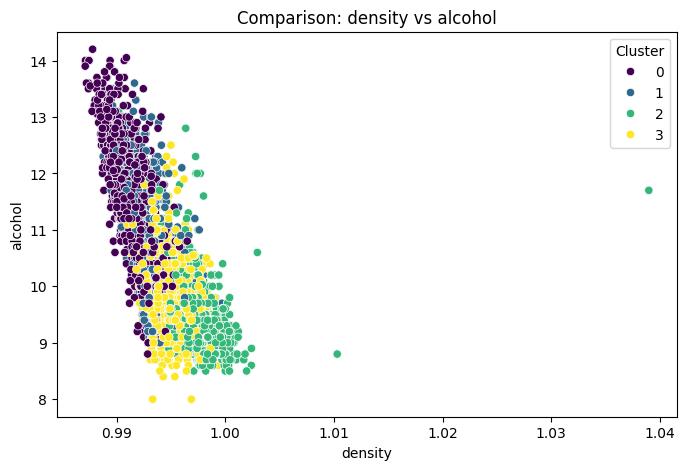

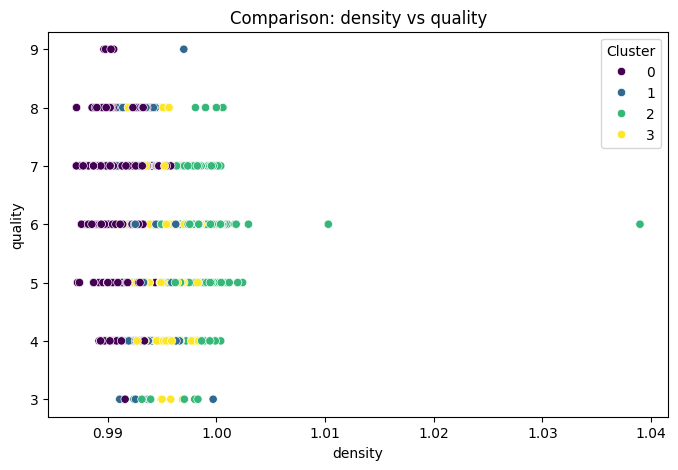

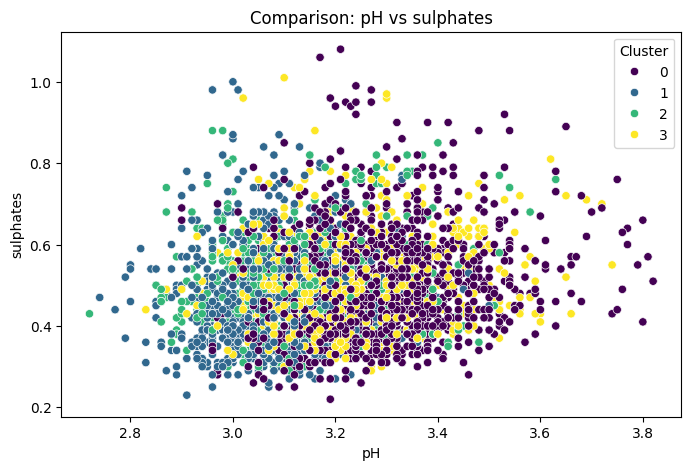

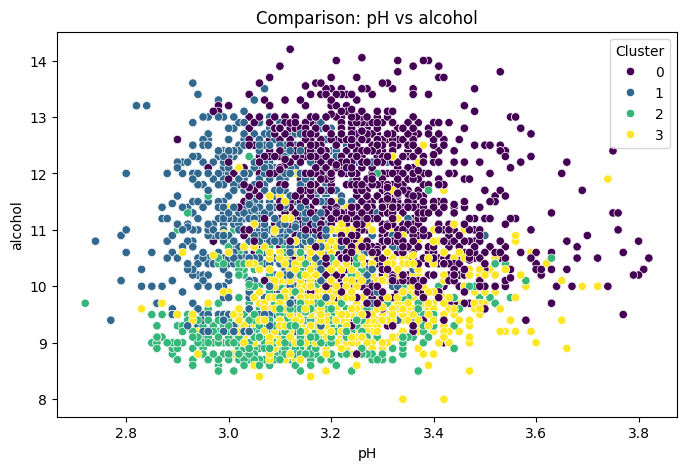

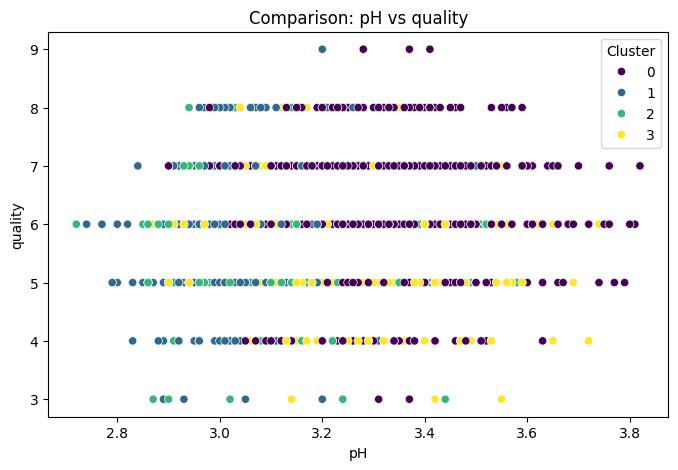

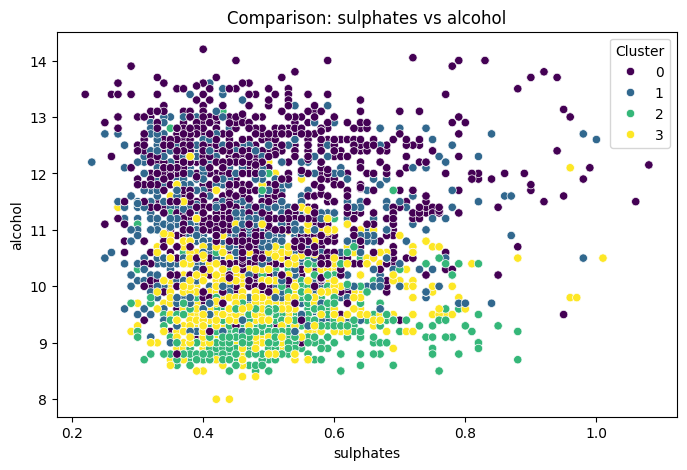

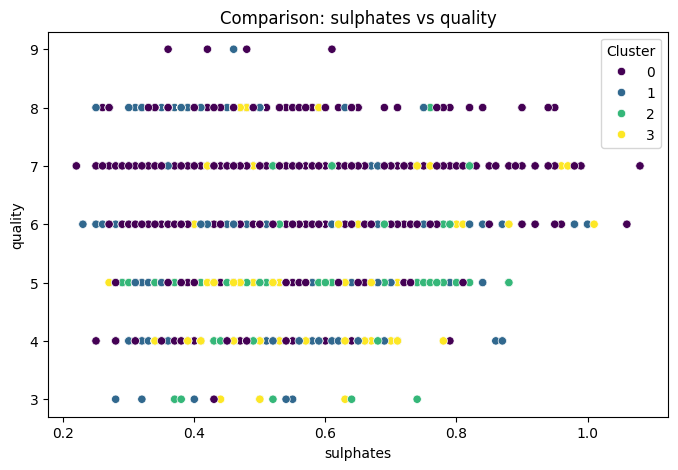

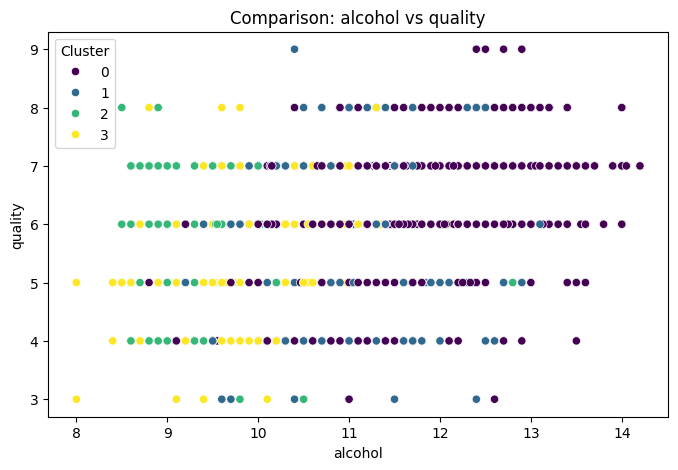

In [99]:
# get only numeric only
numeric_cols = df.select_dtypes(include="number").columns.drop("cluster")

# create all possible combinations of variables
column_pairs = list(itertools.combinations(numeric_cols, 2))

# just a helper variable so we can quickly turn off the visualizations
# since they take a bit time
skip_visuals = False

for x_col, y_col in column_pairs:
    if skip_visuals:
        break

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue="cluster", palette="viridis")
    plt.title(f"Comparison: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title="Cluster")
    plt.show()

In [100]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'cluster'],
      dtype='object')

In [101]:
# X/y -split
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'cluster']]

y = df['quality']

In [102]:
authentic_sample

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              8.5              0.26         0.21            16.2      0.074   
1              5.8              0.24         0.44             3.5      0.029   
2              9.1              0.59         0.38             1.6      0.066   
3              7.1              0.32         0.32            11.0      0.038   
4              6.9              0.39         0.40             4.6      0.022   
..             ...               ...          ...             ...        ...   
285            9.1              0.27         0.45            10.6      0.035   
286            6.6              0.36         0.29             1.6      0.021   
287            7.4              0.24         0.36             2.0      0.031   
288            6.9              0.36         0.34             4.2      0.018   
289            7.1              0.26         0.49             2.2      0.032   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   41.0                 197.0  0.99800  3.02       0.50   
1                    5.0                 109.0  0.99130  3.53       0.43   
2                   34.0                 182.0  0.99680  3.23       0.38   
3                   16.0                  66.0  0.99370  3.24       0.40   
4                    5.0                  19.0  0.99150  3.31       0.37   
..                   ...                   ...      ...   ...        ...   
285                 28.0                 124.0  0.99700  3.20       0.46   
286                 24.0                  85.0  0.98965  3.41       0.61   
287                 27.0                 139.0  0.99055  3.28       0.48   
288                 57.0                 119.0  0.98980  3.28       0.36   
289                 31.0                 113.0  0.99030  3.37       0.42   

     alcohol  quality  cluster  
0        9.8        3        2  
1       11.7        3        0  
2        8.5        3        3  
3       11.5        3        1  
4       12.6        3        0  
..       ...      ...      ...  
285     10.4        9        1  
286     12.4        9        0  
287     12.5        9        0  
288     12.7        9        0  
289     12.9        9        0  

[290 rows x 13 columns]

In [103]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
7617            6.2              0.21         0.29             1.6      0.039   
7618            6.6              0.32         0.36             8.0      0.047   
7619            6.5              0.24         0.19             1.2      0.041   
7620            5.5              0.29         0.30             1.1      0.022   
7621            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
7617                 24.0                  92.0  0.99114  3.27       0.50   
7618                 57.0                 168.0  0.99490  3.15       0.46   
7619                 30.0                 111.0  0.99254  2.99       0.46   
7620                 20.0                 110.0  0.98869  3.34       0.38   
7621                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  cluster  
0         8.8        6        2  
1         9.5        6        0  
2        10.1        6        1  
3         9.9        6        3  
4         9.6        6        3  
...       ...      ...      ...  
7617     11.2        6        0  
7618      9.6        5        3  
7619      9.4        6        1  
7620     12.8        7        0  
7621     11.8        6        0  

[7622 rows x 13 columns]

In [104]:

categories = list(np.unique(df['quality']))

# let's encode our target from the original 3,4,5,6,7,8 to 0,1,2,3,4,5
le = LabelEncoder()
y = le.fit_transform(y)

# if bad result, consider shuffling the dataset just in case

# stratify can be used to ensure that train/test -split aims to have same distributions
# for both train and test datasets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

X_train = X
y_train = y

X_test = authentic_sample[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'cluster']]


y_test = authentic_sample['quality']
y_test = le.transform(y_test)


In [105]:
model = XGBClassifier(
    objective="multi:softmax",
    num_class=6,
    n_estimators = 300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_class=6, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

In [106]:
test_predictions = model.predict(X_test)

<Axes: >

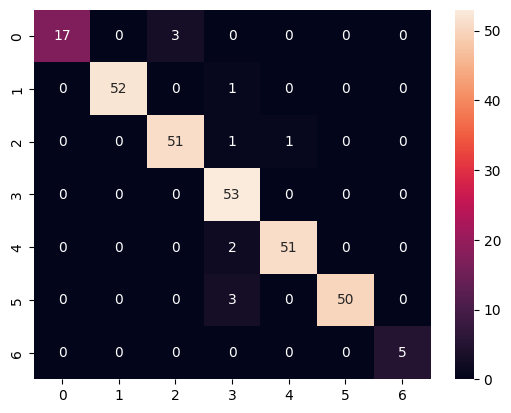

In [107]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

In [108]:
print(classification_report(y_test, test_predictions))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       1.00      0.98      0.99        53
           2       0.94      0.96      0.95        53
           3       0.88      1.00      0.94        53
           4       0.98      0.96      0.97        53
           5       1.00      0.94      0.97        53
           6       1.00      1.00      1.00         5

    accuracy                           0.96       290
   macro avg       0.97      0.96      0.96       290
weighted avg       0.97      0.96      0.96       290


Model overall accuracy: 96.21%
